<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Define--the-Problem" data-toc-modified-id="Define--the-Problem-1">Define  the Problem</a></span></li><li><span><a href="#EDA-&amp;-Data-Cleaning" data-toc-modified-id="EDA-&amp;-Data-Cleaning-2">EDA &amp; Data Cleaning</a></span></li><li><span><a href="#Analysis-of-the-data" data-toc-modified-id="Analysis-of-the-data-3">Analysis of the data</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-4">Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Seasonal-trend" data-toc-modified-id="Seasonal-trend-4.1">Seasonal trend</a></span></li></ul></li><li><span><a href="#Metricts-of-Revenue-analysis" data-toc-modified-id="Metricts-of-Revenue-analysis-5">Metricts of Revenue analysis</a></span><ul class="toc-item"><li><span><a href="#MoM-Growth" data-toc-modified-id="MoM-Growth-5.1">MoM Growth</a></span></li><li><span><a href="#QoQ-Growth" data-toc-modified-id="QoQ-Growth-5.2">QoQ Growth</a></span></li><li><span><a href="#YoY-Growth-by-month" data-toc-modified-id="YoY-Growth-by-month-5.3">YoY Growth by month</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6">Conclusion</a></span></li></ul></div>

# Define  the Problem

- What to explore

With this data we want you to deliver some insights:
How is the company evolving? Is the revenue growing? Would you invest money on them? Try to demonstrate your opinion visually or with some metric, the way you prefer.
Can you find a temporal pattern in the revenue? If you find any, why do you think it happens?


- Observations 

The dataset that I have received has two columns (“Date” and “Revenue”). The observation period of our imaginary company is from 01.01.2019 until 28.04.2021. 


In [1]:
### import the libraries
import os
import pandas as pd
import numpy as np
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Data
df = pd.read_csv('/Users/yuliyahilevich/Desktop/Search/Interview/ritmo/Fake data - Sheet1.csv')
df.head()

,Date,Revenue
0,2019-01-01,0.0
1,2019-01-02,165.9
2,2019-01-03,0.0
3,2019-01-04,0.0
4,2019-01-05,0.0


In [4]:
df.tail()

,Date,Revenue
845,2021-04-25,2573.89
846,2021-04-26,820.88
847,2021-04-27,336.79
848,2021-04-28,258.00
849,2021-04-29,78.40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     850 non-null    object 
 1   Revenue  850 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [6]:
#Lets change the format of Date
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     850 non-null    datetime64[ns]
 1   Revenue  850 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


# EDA & Data Cleaning

In [7]:
df.isnull().sum()

Date       0
Revenue    0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
845    False
846    False
847    False
848    False
849    False
Length: 850, dtype: bool

It appears that we don't have missing either duplicated values

# Analysis of the data
Descriptive Statitics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,850.0,628.904306,1139.707708,-922.35,85.9675,222.1,587.97,7395.61


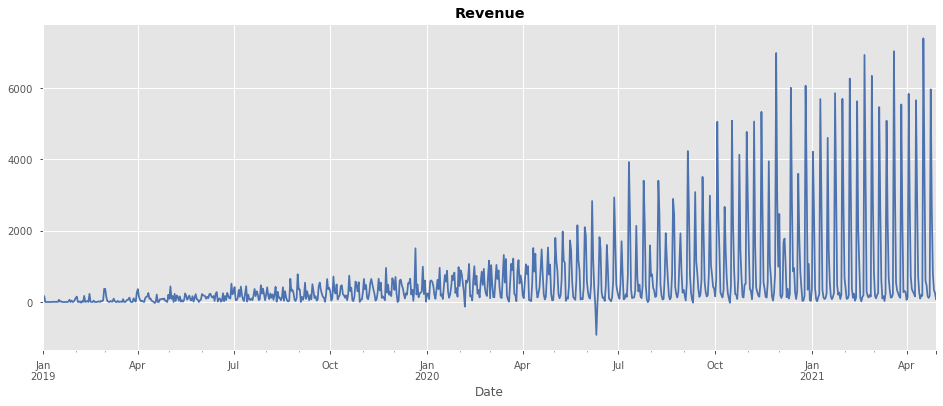

In [66]:
plt.figure(figsize=(16,6))
plt.style.use('seaborn-deep')
df.groupby('Date')['Revenue'].mean().plot()
plt.title('Revenue'.format('date'.capitalize()), fontdict={'fontweight':'bold'})
plt.show()

It appears that we have some negative values. At current stage I will keep those values. 
The mean is far lower than max, so the dataset have not log normal distribution (its skewed)

In [11]:
import pandas_profiling
prof = df.profile_report()
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
#Panda profiling can give us a quick overview of the dataset. In our case int not so relevant but I still decided to have a quick look
prof

# Data Visualization

In [13]:
#Before visualisation we need to create new columns
#df['Month_Year_w'] = df['Date'].apply(lambda x: x.strftime('%Y-%m-%w'))
df['Month_Year'] = df['Date'].apply(lambda x: x.strftime('%Y-%m'))
df

,Date,Revenue,Month_Year
0,2019-01-01,0.00,2019-01
1,2019-01-02,165.90,2019-01
2,2019-01-03,0.00,2019-01
3,2019-01-04,0.00,2019-01
4,2019-01-05,0.00,2019-01
...,...,...,...
845,2021-04-25,2573.89,2021-04
846,2021-04-26,820.88,2021-04
847,2021-04-27,336.79,2021-04
848,2021-04-28,258.00,2021-04


In [14]:
#Lets groupby the dataset by years, months, weeks for the future visualisations
trend=df.groupby('Month_Year').sum()
months = [month for month, df in df.groupby('Month_Year')]
years = [year for year, df in df.groupby('Month_Year')]
weeks = [week for week, df in df.groupby('Month_Year')]

In [15]:
#Calculation of the growth rate
df['Revenue Growth'] = df.Revenue/df.Revenue.shift() - 1
df_growth = df.groupby('Month_Year').sum()
df_growth.head()

,Revenue,Revenue Growth
Month_Year,,
2019-01,468.60,inf
2019-02,1280.90,inf
2019-03,1559.05,inf
2019-04,2422.30,inf
2019-05,3341.65,inf


In [16]:
#Plotting Montly revenue trend
fig = px.bar(df, years,trend['Revenue'])
fig.update_layout(title_text='Monthly Revenue trend')
fig.update_xaxes(title= 'Date',ticklen= 5,zeroline= False)
fig.update_yaxes(title= 'Revenue',ticklen= 5,zeroline= False)   
fig.show()

Revenue is the total amount of income generated by the sale of goods and services related to the primary operations of the business. Increasing revenues over time are generally a good sign of a company's growth. By looking at our data we can observe steady monthly growth of Revenue.

Although looking at another chart, which is being built of the data but in the line format, we can see a general increasing trend with no clear pattern of seasonal or cyclical changes. However, we can observe some picks appearing which is worth having a look at in order to better understand the performance of the company (see ‘Monthly Revenue line chart’).

In [17]:
#Lets build line chart in order to see trend line of Revenue
fig = go.Figure(go.Scatter(x=years, y=trend['Revenue'],
            line=dict(color='blue', width=2)))
fig.update_layout(
    title_text='Montly Revenue line chart')

fig.show()

In [18]:
df_viz=df.loc[:, ['Date', 'Revenue']].copy()
df_viz.set_index('Date', inplace=True)

In [19]:
#Preparing the data for weekly visualisation
weekly_viz= df_viz.reset_index()
weekly_viz

,Date,Revenue
0,2019-01-01,0.00
1,2019-01-02,165.90
2,2019-01-03,0.00
3,2019-01-04,0.00
4,2019-01-05,0.00
...,...,...
845,2021-04-25,2573.89
846,2021-04-26,820.88
847,2021-04-27,336.79
848,2021-04-28,258.00


In [20]:
week_viz= df_viz.resample('W').sum()
week_viz

,Revenue
Date,
2019-01-06,165.90
2019-01-13,19.80
2019-01-20,100.80
2019-01-27,74.60
2019-02-03,377.40
...,...
2021-04-04,9677.97
2021-04-11,10477.23
2021-04-18,12651.29


In [21]:
#Lets get ride of the last week, as after resampling we had extra week
week_viz = week_viz[:-1]
week_viz

,Revenue
Date,
2019-01-06,165.90
2019-01-13,19.80
2019-01-20,100.80
2019-01-27,74.60
2019-02-03,377.40
...,...
2021-03-28,9275.99
2021-04-04,9677.97
2021-04-11,10477.23


In order to better understand possible patterns or trends, let’s slice the data into weekly and daily formats. In the chart below (see ‘Weekly Revenue line chart’) we can see very clearly the changing trend of revenue. 

 From July 2020 the frequency and magnitude of revenue have changed significantly. Over some periods we can spot a certain pattern but its still not very clear. 


In [22]:
#Plotting Weekly Revenue line chart
fig = go.Figure(go.Scatter(x=week_viz.index, y=week_viz['Revenue'],line=dict(color='blue', width=2)))
fig.update_layout(
    title_text='Weekly Revenue line chart')

fig.show()

In [23]:
#Preparing the data for weekday visualisation
df_viz['weekday'] = df_viz.index.day_name()
df_viz

,Revenue,weekday
Date,,
2019-01-01,0.00,Tuesday
2019-01-02,165.90,Wednesday
2019-01-03,0.00,Thursday
2019-01-04,0.00,Friday
2019-01-05,0.00,Saturday
...,...,...
2021-04-25,2573.89,Sunday
2021-04-26,820.88,Monday
2021-04-27,336.79,Tuesday


In [24]:
weekday_viz = df_viz.groupby('weekday').mean()
weekday_viz

,Revenue
weekday,
Friday,355.749752
Monday,502.624628
Saturday,2054.444545
Sunday,1057.657107
Thursday,108.473361
Tuesday,218.929098
Wednesday,116.376721


In [25]:
#Plotting Weekdays Revenue distribution
fig = px.bar(x=weekday_viz.index, y=weekday_viz['Revenue'],text=round(weekday_viz['Revenue']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title= 'Weekdays',ticklen= 5,zeroline= False)
fig.update_yaxes(title= 'Revenue',ticklen= 5,zeroline= False) 
fig.update_layout(
    title_text='Weekdays Revenue distributionn')

fig.show()

We can spot some trend. Let split the dataset on yearly basis

In [26]:
weekday_2019 = df_viz[df_viz.index.year==2019].groupby('weekday').mean()

In [27]:
#Plotting Weekdays Revenue distribution for 2019

fig = px.bar(x=weekday_2019.index, y=weekday_2019['Revenue'],text=round(weekday_2019['Revenue']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title= 'Weekdays',ticklen= 5,zeroline= False)
fig.update_yaxes(title= 'Revenue',ticklen= 5,zeroline= False) 
fig.update_layout(
    title_text='Weekdays Revenue distributionn for 2019')

fig.show()

In [28]:
weekday_2020 = df_viz[df_viz.index.year==2020].groupby('weekday').mean()

In [29]:
#Plotting Weekdays Revenue distribution for 2020

fig = px.bar(x=weekday_2020.index, y=weekday_2020['Revenue'],text=round(weekday_2020['Revenue']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title= 'Weekdays',ticklen= 5,zeroline= False)
fig.update_yaxes(title= 'Revenue',ticklen= 5,zeroline= False) 
fig.update_layout(
    title_text='Weekdays Revenue distributionn for 2020')

fig.show()

In [30]:
weekday_2021 = df_viz[df_viz.index.year==2021].groupby('weekday').median()

In [31]:
#Plotting Weekdays Revenue distribution for 2021

fig = px.bar(x=weekday_2021.index, y=weekday_2021['Revenue'],text=round(weekday_2021['Revenue']))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title= 'Weekdays',ticklen= 5,zeroline= False)
fig.update_yaxes(title= 'Revenue',ticklen= 5,zeroline= False) 
fig.update_layout(
    title_text='Weekdays Revenue distributionn for 2021')

fig.show()

## Seasonal trend 

In [32]:
forecast = df.set_index('Date')
# Select the proper time period for weekly aggreagation
forecast = forecast['2019-01-01':'2021-04-25'].resample('W').sum()
forecast.head()

,Revenue,Revenue Growth
Date,,
2019-01-06,165.9,inf
2019-01-13,19.8,inf
2019-01-20,100.8,inf
2019-01-27,74.6,inf
2019-02-03,377.4,inf


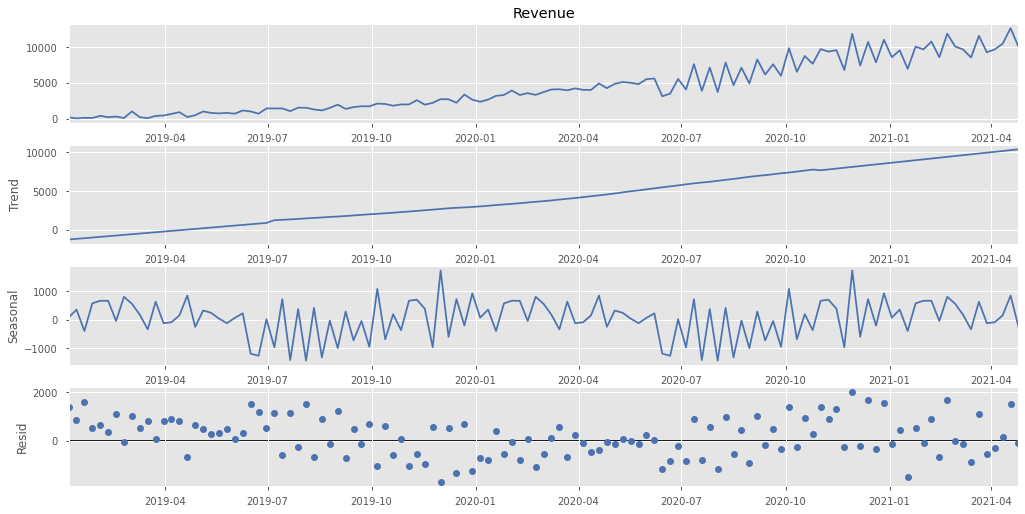

In [68]:
import statsmodels.api as sm

y=forecast['Revenue']
# graphs to show seasonal_decompose
decomposition = sm.tsa.seasonal_decompose(y, model='additive',extrapolate_trend='freq')

fig = decomposition.plot()
fig.set_size_inches(14,7)
plt.style.use('seaborn-deep')
                 
plt.show()

By applying on our dataset ‘statsmodel.api’ we can have a look at the three pieces of decomposed graphs below which are summarizing and making a bit overview of our possible seasonality. 

 Seasonality refers to fluctuations in your sales revenue that are caused by external factors and occur on a predictable schedule around the same time(s) every year. It’s hard or even impossible to control seasonal shifts in consumer behaviour, but being aware of seasonality the company can capitalize on its strong cycles and survive its slow periods.

 We can tell that our sales dataset has an overall increasing trend as well as a little yearly seasonality, from July – January and from January to July we can spot certain trends in picks


# Metricts of Revenue analysis

Revenue Growth Rate
 Revenue Growth Rate is an indicator of how well a company is able to grow its sales revenue over a given time period. While the revenue is an actual number, the revenue growth rates simply compare the current sales figures (total revenue) with a previous period (typically quarter to quarter or year to year).

 This provides an indicator that allows easier comparisons between different firms (especially in the same industries or markets) and provides a measure of the extent to which a company is able to grow.



## MoM Growth
 
MoM 

 MoM (Month-over-Month) changes in levels expressed with respect to the previous month. MoM measures tend to be more volatile as they are more affected by one-time events (e.g. stock market crash, natural disasters, months with many working days, months with many people on vacation, etc.). 

In [34]:
# MoM data will be used to calculate MoM growth
MoM_Data = pd.DataFrame(trend['Revenue'])

In [35]:
MoM_Data['Last_Month'] = np.roll(MoM_Data['Revenue'],1)
MoM_Data

#By default, python has put the last value in the column and rolled up over there. SO we need to remove that.

MoM_Data = MoM_Data.drop(MoM_Data.index[0])

In [36]:
#Calculating MoM growth for each month
MoM_Data['Growth'] = (MoM_Data['Revenue']/MoM_Data['Last_Month'])-1
MoM_Data.head()

,Revenue,Last_Month,Growth
Month_Year,,,
2019-02,1280.90,468.60,1.733461
2019-03,1559.05,1280.90,0.217152
2019-04,2422.30,1559.05,0.553703
2019-05,3341.65,2422.30,0.379536
2019-06,4635.80,3341.65,0.387279


In [37]:
results = MoM_Data.drop(columns = ["Revenue", "Last_Month"])
results['Months'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Months
0,1.733461,2019-02
1,0.217152,2019-03
2,0.553703,2019-04
3,0.379536,2019-05
4,0.387279,2019-06


In [38]:
#Lets get ride of the first month
results = results[1:]
results.head()

,Growth,Months
1,0.217152,2019-03
2,0.553703,2019-04
3,0.379536,2019-05
4,0.387279,2019-06
5,0.298967,2019-07


In [39]:
#Plotting MoM Growth

fig = px.bar(results,results['Months'],results['Growth']*100,text=round(results['Growth']*100))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title= 'Months',ticklen= 5,zeroline= False)
fig.update_yaxes(title= '% Growth',ticklen= 5,zeroline= False) 
fig.update_layout(title_text='MoM Revenue Growth')

fig.show()

In our case (see graph “MoM revenue Growth”) we can see that overall the tendency of revenue growth is slowing down. The important month for us is the one that has the negative tendency, it would be interesting for us to investigate the cause of those actions, as well as high growth. However, this indicator may sometimes give misleading results, particularly when a long-term plan or potential estimation is being done. Hence, we should note the shortcomings of this indicator and use it with similar indicators such as QoQ and YoY.


## QoQ Growth

QoQ (Quarter-over-Quarter) figures calculate change compared to the previous financial quarter, such as comparing Q2 with Q1 of this year. Although many figures are released monthly, many important indicators are released on a quarterly basis, such as GDP (gross domestic product). QoQ will tend to be more volatile than Year-over-Year figures but less volatile than MoM numbers.

In [40]:
df['Qtr'] = df['Date'].apply(lambda x: x.strftime('%m'))
df['Qtr'] = pd.to_numeric(df['Qtr'])//4+1
df['Year'] = df['Date'].apply(lambda x: x.strftime('%Y'))
df['Qtr_Yr'] = df['Year'].astype(str) + '-Q' + df['Qtr'].astype(str)
df.drop('Qtr', axis=1)
df.head()

,Date,Revenue,Month_Year,Revenue Growth,Qtr,Year,Qtr_Yr
0,2019-01-01,0.0,2019-01,NaN,1,2019,2019-Q1
1,2019-01-02,165.9,2019-01,inf,1,2019,2019-Q1
2,2019-01-03,0.0,2019-01,-1.0,1,2019,2019-Q1
3,2019-01-04,0.0,2019-01,NaN,1,2019,2019-Q1
4,2019-01-05,0.0,2019-01,NaN,1,2019,2019-Q1


In [41]:
results = df.groupby('Qtr_Yr').sum()
results.head()

,Revenue,Revenue Growth,Qtr
Qtr_Yr,,,
2019-Q1,3308.55,inf,90
2019-Q2,16421.50,inf,244
2019-Q3,32044.04,-539.384488,366
2019-Q4,11843.15,inf,124
2020-Q1,46310.67,159.099911,91


In [42]:
QoQ_Data = pd.DataFrame(results['Revenue'])

QoQ_Data['Last_Qtr'] = np.roll(QoQ_Data['Revenue'],1)
QoQ_Data

QoQ_Data = QoQ_Data.drop(QoQ_Data.index[0])

In [43]:
#Calculating QoQ Growth for each Qtr:
QoQ_Data['Growth'] = (QoQ_Data['Revenue']/QoQ_Data['Last_Qtr'])-1
QoQ_Data.head()

,Revenue,Last_Qtr,Growth
Qtr_Yr,,,
2019-Q2,16421.50,3308.55,3.963353
2019-Q3,32044.04,16421.50,0.951347
2019-Q4,11843.15,32044.04,-0.630410
2020-Q1,46310.67,11843.15,2.910334
2020-Q2,83813.01,46310.67,0.809799


In [44]:
results = QoQ_Data.drop(columns = ["Revenue", "Last_Qtr"])
results['Quarter'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Quarter
0,3.963353,2019-Q2
1,0.951347,2019-Q3
2,-0.630410,2019-Q4
3,2.910334,2020-Q1
4,0.809799,2020-Q2


In [45]:
#Plotting QoQ growth
fig = px.bar(results,results['Quarter'],results['Growth']*100,text=round(results['Growth']*100))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title= 'Quarter',ticklen= 5,zeroline= False)
fig.update_yaxes(title= '% Growth',ticklen= 5,zeroline= False) 
fig.update_layout(title_text='QoQ Revenue Growth over time')

fig.show()

In our case, we can see that QoQ revenue is slower, but it’s still growing. By comparing the same quatres in different years, it is possible to draw accurate comparisons despite the seasonal nature of consumer behaviour. In our case, we can clearly see a similar trend where in Q4 revenue is always tend to decrease compared with the previous month 


## YoY Growth by month

YoY (Year-over-Year) figures report the changes in a year’s worth of data, in comparison with the previous year. YoY incorporates more data and thus is able to give a better long-term picture of the underlying report figure.

In [46]:
#Creating sales grouped by Month-Year again
YoY_Data = pd.DataFrame(df.groupby('Month_Year').sum()['Revenue'])
YoY_Data['Last_Year'] = np.roll(YoY_Data['Revenue'],12)
#YoY_Data

In [47]:
YoY_Data = YoY_Data.drop(YoY_Data.index[0:12])
YoY_Data.head()

,Revenue,Last_Year
Month_Year,,
2020-01,13458.82,468.60
2020-02,15087.41,1280.90
2020-03,17764.44,1559.05
2020-04,17243.44,2422.30
2020-05,23925.91,3341.65


In [48]:
#Calculating YoY Growth for each month:
YoY_Data['Growth'] = (YoY_Data['Revenue']/YoY_Data['Last_Year'])-1
YoY_Data.head()

,Revenue,Last_Year,Growth
Month_Year,,,
2020-01,13458.82,468.60,27.721340
2020-02,15087.41,1280.90,10.778757
2020-03,17764.44,1559.05,10.394400
2020-04,17243.44,2422.30,6.118623
2020-05,23925.91,3341.65,6.159909


In [49]:
results = YoY_Data.drop(columns = ["Revenue", "Last_Year"])
results['Month_Year'] = results.index
results.reset_index(drop=True, inplace=True)
results.head()

,Growth,Month_Year
0,27.721340,2020-01
1,10.778757,2020-02
2,10.394400,2020-03
3,6.118623,2020-04
4,6.159909,2020-05


In [50]:
#Plotting YoY growth
fig = px.bar(results,results['Month_Year'],results['Growth']*100,text=round(results['Growth']*100))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_xaxes(title= 'YoY Growth Over Months',ticklen= 5,zeroline= False)
fig.update_yaxes(title= '% Growth',ticklen= 5,zeroline= False) 
fig.update_layout(title_text='YoY Growth Over Months')

fig.show()

Despite decreasing year-over-year earnings,  the stable growth of the company’s revenue, the overall outlook is favourable.

# Conclusion

 - Overall in our case, we can see a bit of mixed results. YoY report revealing that the growth of year-over-year earnings continue to decline, even while revenue is increasing. We can speculate that the company increased advertising and promotional investments, and looking for new channels. Overall growth can be explained thanks to the company's solid presence in the market and product diversification.
 
 
 - The seasonality of the company becoming stronger, especially becoming very obvious the development of weekends sales. MoM of the company it’s not stable and requires investigation. QoQ has quite a clear pattern which is helping to draw accurate comparisons over the years. Knowing all those specialties can only help the company to develop good marketing and price strategies, customer relationship strategy and other valuable metrics and strategics.
 
 
 - The forecast calculated by Tableau appearing too good to be true, but nerveless its a very positive forecast, and even if only 50% of it become the reality, the metric of Revenue growth still going be exceptional.
 
 
-  Revenue growth is exceptional comparing 2019 and 2020 and its 376% ((302,858 – 63,617) / 63,617 x 100 = 376%). Growth rate benchmarks vary by company stage and the industry, but on average, companies fall between 15% and 45% for year-over-year growth. A company that achieves or reports high revenue growth will likely represent a high return on investment possibility. 
 
 
-  Of course, before the final decision of investment into the company or decision of providing the loan, I would love to see more details such as Operating and Net profit, Ratio of Liquidity, Activity and Leverage, but without any extra data, I would definitely consider investing into the company. Exactly an extra investment can be a key factor for the bosting further growth of the company.

